<a href="https://colab.research.google.com/github/weslei-silva87/modelagem-de-dados-Python/blob/main/modelagem_de_dados_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Realizando a instalação das bibliotecas


In [ ]:
!pip install sidetable
!pip install pandas-profiling==3.3.0
!pip install pandas
!pip install datasets
!pip install --upgrade matplotlib

Carregando dados

In [3]:
import pandas as pd
tabela = pd.read_csv('/content/dados dataset.csv', encoding='latin1')
display(tabela)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
338919,566571,23390,DOLLY GIRL MINI BACKPACK,4.0,9/13/2011 12:49,4.15,17037.0,United Kingdom
338920,566571,22949,36 DOILIES DOLLY GIRL,12.0,9/13/2011 12:49,1.45,17037.0,United Kingdom
338921,566571,22138,BAKING SET 9 PIECE RETROSPOT,3.0,9/13/2011 12:49,4.95,17037.0,United Kingdom
338922,566571,23203,JUMBO BAG VINTAGE DOILY,10.0,9/13/2011 12:49,2.08,17037.0,United Kingdom


Analisando dados nulos

In [5]:
# Verificar valores nulos
print(tabela.isnull().sum())

InvoiceNo           0
StockCode           0
Quantity            1
InvoiceDate         1
UnitPrice           1
CustomerID     100441
Country             1
dtype: int64


In [4]:
#Removendos dados nulos da coluna 'Description'
tabela = pd.read_csv('/content/dados dataset.csv', encoding='latin1')
tabela = tabela.drop(columns=['Description'])

print("Dados após a exclusão das colunas:")
display(tabela)



Dados após a exclusão das colunas:


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
388429,570428,23173,2.0,10/10/2011 14:02,9.95,15553.0,United Kingdom
388430,570428,23175,4.0,10/10/2011 14:02,3.25,15553.0,United Kingdom
388431,570428,22072,2.0,10/10/2011 14:02,3.75,15553.0,United Kingdom
388432,570428,23173,1.0,10/10/2011 14:02,9.95,15553.0,United Kingdom


Removendo valores menores ou igual a zeo

In [6]:
# Excluir linhas com valores de 'UnitPrice' menores ou iguais a zero
tabela = tabela[tabela['UnitPrice'] > 0]

# Exibir a tabela atualizada
display(tabela)


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
388428,570428,72586,1.0,10/10/2011 14:02,0.42,15553.0,United Kingdom
388429,570428,23173,2.0,10/10/2011 14:02,9.95,15553.0,United Kingdom
388430,570428,23175,4.0,10/10/2011 14:02,3.25,15553.0,United Kingdom
388431,570428,22072,2.0,10/10/2011 14:02,3.75,15553.0,United Kingdom


Analisando valoes duplicados

In [7]:
#identificar valores duplicados
tabela.duplicated().sum()


3108

In [8]:
#identificando valores duplicado para cada Linha
(tabela
 .groupby(tabela.columns.tolist(), dropna=False)
 .size()
 .to_frame("n_duplicates")
 .query("n_duplicates>1")
 .sort_values("n_duplicates", ascending=False)
 .head(10)
)

n_duplicates
InvoiceNo StockCode Quantity InvoiceDate      UnitPrice CustomerID Country                     
555524    22698     1.0      6/5/2011 11:37   2.95      16923.0    United Kingdom            20
          22697     1.0      6/5/2011 11:37   2.95      16923.0    United Kingdom            12
541266    21754     1.0      1/16/2011 16:25  5.95      15673.0    United Kingdom             6
          21755     1.0      1/16/2011 16:25  5.95      15673.0    United Kingdom             6
540524    21756     1.0      1/9/2011 12:53   5.95      16735.0    United Kingdom             6
538514    21756     1.0      12/12/2010 14:27 5.95      15044.0    United Kingdom             6
537224    70007     1.0      12/5/2010 16:24  1.65      13174.0    United Kingdom             5
550331    85202     1.0      4/17/2011 13:43  0.42      15555.0    United Kingdom             5
538517    22749     1.0      12/12/2010 16:05 3.75      17618.0    United Kingdom             5
547712    22699     1.0      3/24/2011 19:31  2.95      16905.0    United Kingdom             5

In [9]:

#removendo dados duplicados
registros_antes = tabela.shape[0]

tabela = tabela_sem_duplicatas = tabela.drop_duplicates()

registros_depois = tabela_sem_duplicatas.shape[0]

registros_removidos = registros_antes - registros_depois

print("Número removidos:", registros_removidos)


Número removidos: 3108


In [10]:
#verificando valores duplicado para cada Linha
(tabela
 .groupby(tabela.columns.tolist(), dropna=False)
 .size()
 .to_frame("n_duplicates")
 .query("n_duplicates>1")
 .sort_values("n_duplicates", ascending=False)
 .head(10)
)

,,,,,,,n_duplicates
InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,


In [11]:
#confirmando valores duplicados
tabela_sem_duplicatas = tabela
tabela.duplicated().sum()

0

Verificando valores nulos restantes

In [12]:
# Verificar valores nulos
print(tabela.isnull().sum())

InvoiceNo          0
StockCode          0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     98399
Country            0
dtype: int64


In [13]:
# Excluir as linhas com valores nulos na coluna 'CustomerID'
tabela = tabela.dropna(subset=['CustomerID'])

# Exibir o dataframe após as alterações
print(tabela.isnull().sum())


InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Analisando os tipos de dados

In [14]:
# Verificando os tipos de dados
print(tabela.dtypes)

InvoiceNo       object
StockCode       object
Quantity       float64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [15]:
# Convertendo os Tipos dados das colunas 'InvoiceDate' e 'CustomerID'

tabela['InvoiceDate'] = pd.to_datetime(tabela['InvoiceDate'])
tabela['CustomerID'] = tabela['CustomerID'].astype('Int64')


# Verificando os tipos de dados após a conversão
print(tabela.dtypes)


InvoiceNo              object
StockCode              object
Quantity              float64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              Int64
Country                object
dtype: object


<ipython-input-15-dddc9f736b5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela['InvoiceDate'] = pd.to_datetime(tabela['InvoiceDate'])
<ipython-input-15-dddc9f736b5f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela['CustomerID'] = tabela['CustomerID'].astype('Int64')


Analsando os Outliers

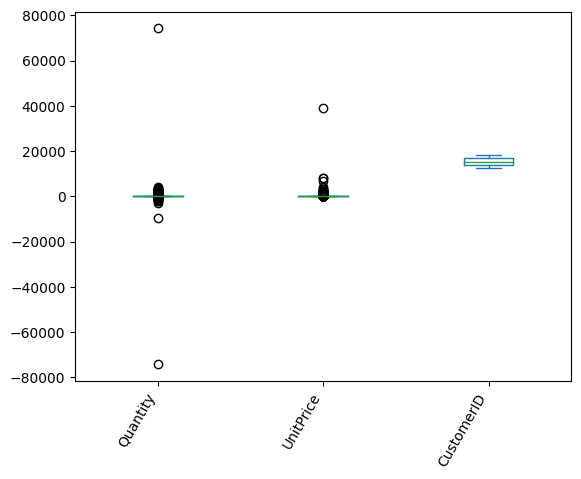

In [16]:
# verificando outliers
import matplotlib.pyplot as plt
tabela.plot.box()
plt.xticks(rotation=60, ha='right')
plt.show()

In [17]:
import numpy as np
#Função
def is_outliers(row, qty_limit=10000, price_limit=5.0):

    # Checando colunas quantity e Uniprice
    qty_outlier = row['Quantity'] > qty_limit

    price_outlier = row['UnitPrice'] > price_limit

    return qty_outlier or price_outlier



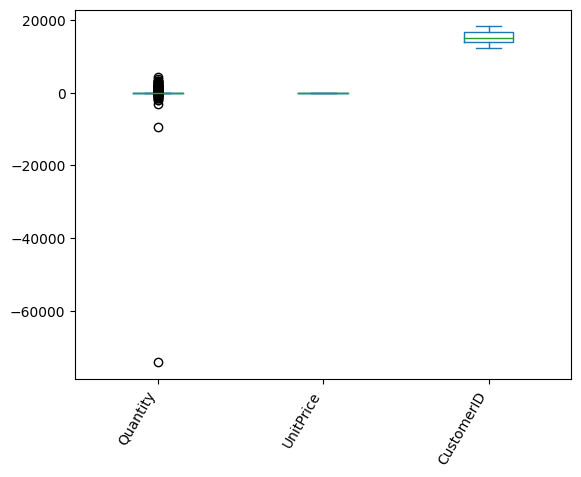

In [18]:

# Aplicando a função
outliers_mask = tabela.apply(is_outliers, axis=1)

# Filtro baseado na função
tabela_nova = tabela[~outliers_mask]
outliers = tabela[outliers_mask]

# verificando outliers
tabela_nova.plot.box()
plt.xticks(rotation=60, ha='right')
plt.show()


Criando uma nova coluna Faturamento

In [19]:
# Criar a nova coluna 'Faturamento'
tabela_nova['invoicing'] = tabela_nova['Quantity'] * tabela['UnitPrice']
display(tabela_nova.head())

<ipython-input-19-da37487031e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_nova['invoicing'] = tabela_nova['Quantity'] * tabela['UnitPrice']


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoicing
0,536365,85123A,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


Função Max

In [20]:
# Função Max para utima dataVamos supor que 'Date' seja a coluna que contém as datas das compras
data_ultima_compra = tabela_nova['InvoiceDate'].max()

print("Data da última compra no dataset:", data_ultima_compra)


Data da última compra no dataset: 2011-10-10 14:02:00


Top 10 países com maior valor em vendas

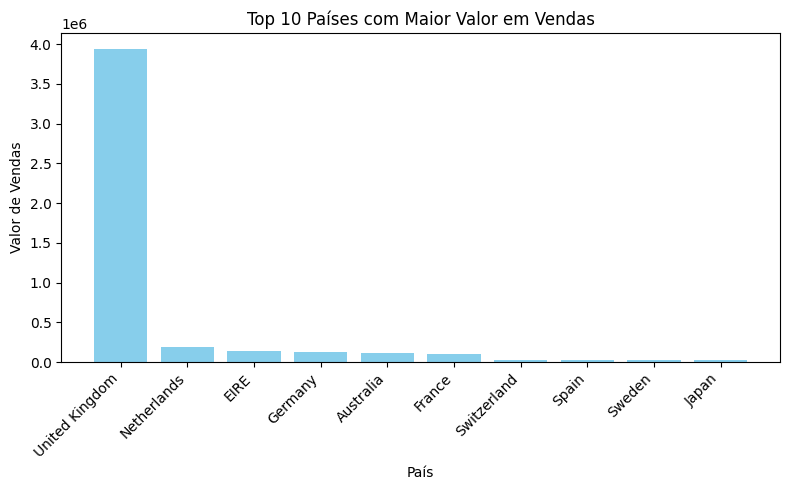

In [21]:

# Calculando o valor total de vendas por país
vendas_country = tabela_nova.groupby('Country')['invoicing'].sum().reset_index()

# Ordenando os países pelo valor total de vendas em ordem decrescente
top_countries = vendas_country.sort_values(by='invoicing', ascending=False)

# Obtendo os Top 10 países com maior valor em vendas
top_10 = top_countries.head(10)

# Plotando o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(top_10['Country'], top_10['invoicing'], color='skyblue')

plt.xlabel('País')
plt.ylabel('Valor de Vendas')
plt.title('Top 10 Países com Maior Valor em Vendas')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Top 10 produtos mais vendidos

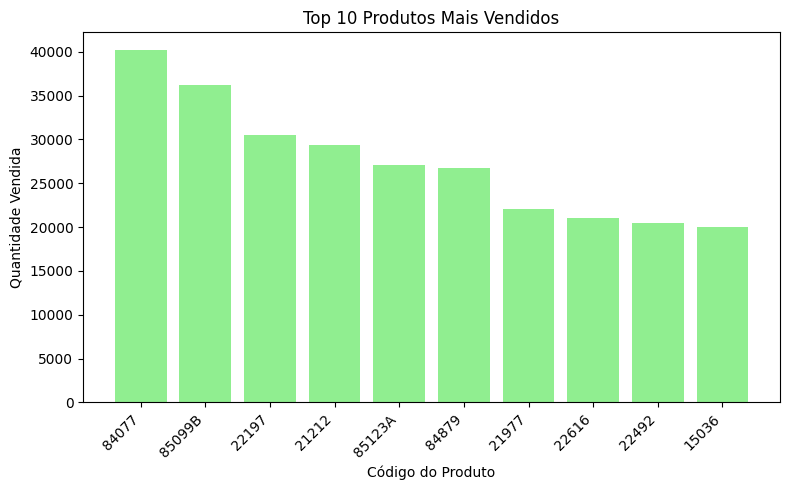

In [22]:

# Calculando a quantidade total vendida por produto
quantity_by_product = tabela_nova.groupby('StockCode')['Quantity'].sum().reset_index()

# Ordenando os produtos pela quantidade total vendida em ordem decrescente
top_products = quantity_by_product.sort_values(by='Quantity', ascending=False)

# Obtendo os Top 10 produtos mais vendidos
top_10_products = top_products.head(10)

# Plotando o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(top_10_products['StockCode'], top_10_products['Quantity'], color='lightgreen')
plt.xlabel('Código do Produto')
plt.ylabel('Quantidade Vendida')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Valor de venda total por mês


<ipython-input-23-b47f2551d139>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_nova['Month'] = tabela_nova['InvoiceDate'].dt.to_period('M')


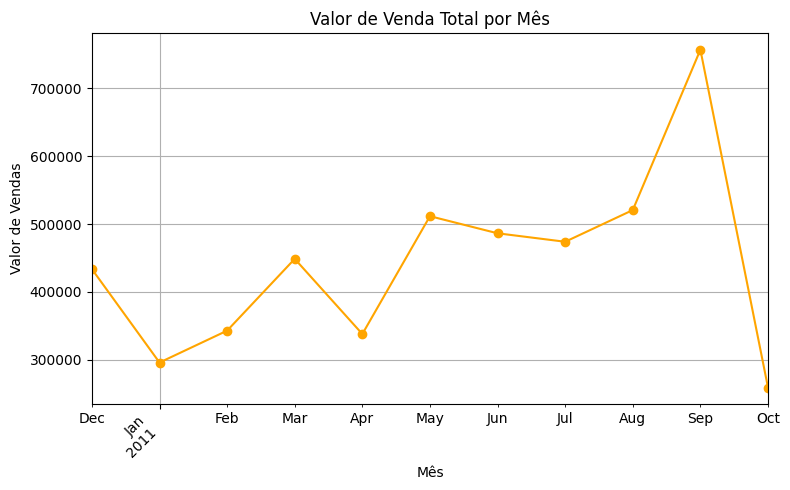

In [23]:
import matplotlib.pyplot as plt

# Extrair o mês da coluna 'InvoiceDate' e criar uma nova coluna 'Month'
tabela_nova['Month'] = tabela_nova['InvoiceDate'].dt.to_period('M')

# Calculando o valor total de vendas por mês
vendas_mes = tabela_nova.groupby('Month')['invoicing'].sum()

# Plotando o gráfico de linha
plt.figure(figsize=(8, 5))
vendas_mes.plot(marker='o', color='orange', linestyle='-')

plt.xlabel('Mês')
plt.ylabel('Valor de Vendas')
plt.title('Valor de Venda Total por Mês')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()



Valor de venda total por mês e por país (considere apenas os top 10)


<Figure size 1200x800 with 0 Axes>

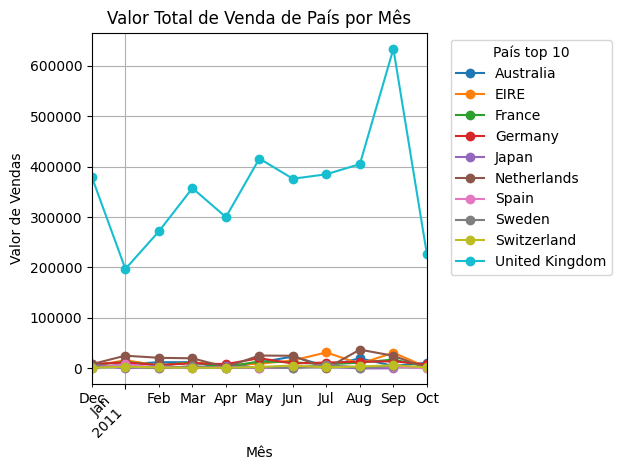

In [24]:

import matplotlib.pyplot as plt

# Calculando o valor total de vendas por país
sales_by_country = tabela_nova.groupby('Country')['invoicing'].sum().reset_index()

# Ordenando os países pelo valor total de vendas em ordem decrescente
top_countries = sales_by_country.sort_values(by='invoicing', ascending=False)

# Obtendo os Top 10 países com maior valor em vendas
top_10_countries = top_countries.head(10)

# Filtrando as linhas dos Top 10 países
df_top_10_countries = tabela_nova[tabela_nova['Country'].isin(top_10_countries['Country'])]

# Calculando o valor total de vendas por mês e por país
sales_by_month_country = df_top_10_countries.groupby(['Month', 'Country'])['invoicing'].sum().unstack()

# Plotando o gráfico de linha
plt.figure(figsize=(12, 8))
sales_by_month_country.plot(marker='o', linestyle='-')
plt.xlabel('Mês')
plt.ylabel('Valor de Vendas')
plt.title('Valor Total de Venda de País por Mês')
plt.xticks(rotation=45, ha='right')
plt.legend(title='País top 10', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


Cálculo do RFM

In [25]:
# Agrupar os dados por cliente e pedido para obter a data e o preço total do pedido
grouped_data = tabela_nova.groupby(['CustomerID', 'InvoiceNo']).agg({'InvoiceDate': 'max', 'UnitPrice': 'sum'})
print(grouped_data)


                             InvoiceDate  UnitPrice
CustomerID InvoiceNo                               
12346      C541433   2011-01-18 10:17:00       1.04
12347      537626    2010-12-07 14:57:00      78.15
           542237    2011-01-26 14:30:00      60.42
           549222    2011-04-07 10:43:00      49.54
           556201    2011-06-09 13:01:00      43.67
...                                  ...        ...
18283      557956    2011-06-23 19:20:00     121.81
           560025    2011-07-14 13:00:00      88.21
           560032    2011-07-14 13:20:00       1.25
           565579    2011-09-05 12:35:00      65.89
18287      554065    2011-05-22 10:39:00      48.42

[15465 rows x 2 columns]


In [26]:

# Calcular a recência para cada cliente
recencia = (data_ultima_compra - grouped_data.groupby('CustomerID')['InvoiceDate'].max()).dt.days
print(recencia)



CustomerID
12346    265
12347     69
12348     15
12350    249
12352     11
        ... 
18280    217
18281    120
18282     61
18283     35
18287    141
Name: InvoiceDate, Length: 3724, dtype: int64


In [27]:

# Calcular a frequência para cada cliente
frequencia = grouped_data.groupby('CustomerID').size()
print(frequencia)


CustomerID
12346     1
12347     5
12348     4
12350     1
12352     7
         ..
18280     1
18281     1
18282     2
18283    10
18287     1
Length: 3724, dtype: int64


In [28]:

# Calcular o ticket médio para cada cliente
ticket_medio = grouped_data.groupby('CustomerID')['UnitPrice'].mean()
print(ticket_medio)


CustomerID
12346     1.040000
12347    55.824000
12348     4.677500
12350    25.300000
12352    23.017143
           ...    
18280    23.850000
18281     5.460000
18282     3.455000
18283    69.507000
18287    48.420000
Name: UnitPrice, Length: 3724, dtype: float64


In [29]:

# Criar um DataFrame com os resultados do RFM
rfm_data = pd.DataFrame({'Recência': recencia,
                         'Frequência': frequencia,
                         'Ticket Médio': ticket_medio})

# Exibir o DataFrame com os resultados do RFM
print(rfm_data)

            Recência  Frequência  Ticket Médio
CustomerID                                    
12346            265           1      1.040000
12347             69           5     55.824000
12348             15           4      4.677500
12350            249           1     25.300000
12352             11           7     23.017143
...              ...         ...           ...
18280            217           1     23.850000
18281            120           1      5.460000
18282             61           2      3.455000
18283             35          10     69.507000
18287            141           1     48.420000

[3724 rows x 3 columns]


Salvando o aquivo

In [30]:
# Abrir o arquivo 'tabela_nova.csv' para escrita com encoding 'latin1'
with open('tabela_nova.csv', 'w', encoding='latin1') as f:
    # Escrever o cabeçalho
    f.write(','.join(tabela_nova.columns) + '\n')

    # Escrever os dados
    for index, row in tabela_nova.iterrows():
        f.write(','.join(map(str, row.values)) + '\n')

print("Arquivo salvo com sucesso!")


Arquivo salvo com sucesso!
